In [172]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import math as mt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import os 
import re
from PIL import Image
from skimage import io

from MLP import MLP as MLPpy

sns.set()

In [61]:
path = os.getcwd()
print(path)

C:\Users\diego\Documents\FCiencias\2022-1\Redes Neuronales\Redes Neuronales\Clasificacion


In [395]:
dirname = os.path.join(os.getcwd())
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            img = np.array(image)
            img = img.reshape(img.shape[0],img.shape[1],-1)
            n = 60
            nX = mt.floor(image.shape[0]/n)
            nY = mt.floor(image.shape[1]/n)
            compImg = []

            if(img.shape[2] == 3):
                cant=cant+1
                for i in range(0,n):

                    compImg.append([])
                    for j in range(0,n):

                        cx   = 0
                        cy   = 0
                        cz   = 0
                        cont = 0

                        for k in range(j*nY,(j+1)*nY):

                            X =  [img[h][k][0] for h in range(i*nX,(i+1)*nX)]
                            Y =  [img[h][k][1] for h in range(i*nX,(i+1)*nX)]
                            Z =  [img[h][k][2] for h in range(i*nX,(i+1)*nX)]
                            cx = cx + sum(X)
                            cy = cy + sum(Y)
                            cz = cz + sum(Z)
                            cont = cont + len(X)



                        cx = round(cx/cont)
                        cy = round(cy/cont)
                        cz = round(cz/cont)

                        compImg[i].append([cx,cy,cz])
                        
                compImg = np.array(compImg).reshape(n,n,3)

                images.append(compImg)
                b = "Leyendo..." + str(cant)
                print (b, end="\r")
                if prevRoot !=root:
                    print(root, cant)
                    prevRoot=root
                    directories.append(root)
                    dircount.append(cant)
                    cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))



leyendo imagenes de  C:\Users\diego\Documents\FCiencias\2022-1\Redes Neuronales\Redes Neuronales\Clasificacion\
C:\Users\diego\Documents\FCiencias\2022-1\Redes Neuronales\Redes Neuronales\Clasificacion\bishopImages 1
C:\Users\diego\Documents\FCiencias\2022-1\Redes Neuronales\Redes Neuronales\Clasificacion\KnightImages 127
C:\Users\diego\Documents\FCiencias\2022-1\Redes Neuronales\Redes Neuronales\Clasificacion\PawnImages 141
C:\Users\diego\Documents\FCiencias\2022-1\Redes Neuronales\Redes Neuronales\Clasificacion\Queenimages 62
C:\Users\diego\Documents\FCiencias\2022-1\Redes Neuronales\Redes Neuronales\Clasificacion\RookImage 98
Directorios leidos: 5
Imagenes en cada directorio [128, 141, 62, 98, 108]
suma Total de imagenes en subdirs: 537


In [396]:
i = 0
z = np.zeros((dircount[0],5)) 
ev = np.zeros(5)
ev[i] = 1
z = z + ev
labels= np.array(z)

piezas = []
indice = 0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    piezas.append(name[len(name)-1])
    indice=indice+1

for i in range(1,5):
    
    d = dircount[i]
    z = np.zeros((d,5)) 
    ev = np.zeros(5)
    ev[i] = 1
    z = z + ev
    labels = np.concatenate((labels,z))
        
y = np.array(labels).reshape(-1,5)
X = np.array(images, dtype=np.uint8) 

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

print(X.shape)
print(y.shape)


X = X.reshape(-1,n*n*3)/255
print(X.shape)
print(y.shape)

train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)

0 bishopImages
1 KnightImages
2 PawnImages
3 Queenimages
4 RookImage
Total number of outputs :  2
Output classes :  [0.0000 1.0000]
(537, 60, 60, 3)
(537, 5)
(537, 10800)
(537, 5)


(2003, 880, 3)


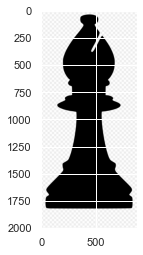

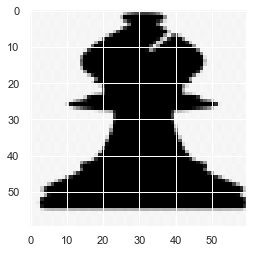

(60, 60, 3)
(1, 10800)
bishopImages


In [458]:
image=plt.imread(path + "/bishopImages/00000048.jpg")
image = np.array(image)
image = image.reshape(image.shape[0],image.shape[1],-1)
print(image.shape)

imG = image[:,:,0]/3 + image[:,:,1]/3 + image[:,:,2]/3
image2 = np.array(image)
image2[:,:,0] = imG
image2[:,:,1] = imG
image2[:,:,2] = imG

plt.imshow(image,vmin=0,vmax=1)
plt.show()

compImg = []

imG = image[:,:,2]
    
n = 60
nX = mt.floor(imG.shape[0]/n)
nY = mt.floor(imG.shape[1]/n)

for i in range(0,n):
    
    compImg.append([])
    for j in range(0,n):
        
        cx   = 0
        cy   = 0
        cz   = 0
        cont = 0
        
        for k in range(j*nY,(j+1)*nY):
            
            X =  [image[h][k][0] for h in range(i*nX,(i+1)*nX)]
            Y =  [image[h][k][1] for h in range(i*nX,(i+1)*nX)]
            Z =  [image[h][k][2] for h in range(i*nX,(i+1)*nX)]
            cx = cx + sum(X)
            cy = cy + sum(Y)
            cz = cz + sum(Z)
            cont = cont + len(X)
        
        
        
        cx = round(cx/cont)
        cy = round(cy/cont)
        cz = round(cz/cont)
            
        compImg[i].append([cx,cy,cz])
        
        
compImg = np.array(compImg).reshape(n,n,3)
        
plt.imshow(compImg,vmin=0,vmax=1)
plt.show()
print(compImg.shape)
compImg = np.ravel(compImg/1000).reshape(1,-1)
print(compImg.shape)

fX = MLP2.aplicar(compImg)
fX2 = fX/np.amax(fX)
fX3 = fX2**20

idx = np.where(fX3 == 1)
print(piezas[idx[1][0]])

In [64]:
def error(X,Y):
    
    return np.mean((X-Y)**2)
    
def gError(X,Y):
    
    return (X-Y)


In [65]:
class MLP:
    
    #Coleccion de numero de neuronas por capa
    T = []
    
    #coleccion de transformaciones lineales
    F = []
    L = 0
    
    #Coleccion de umbrales 
    B = []
    
    #Coleccion de salidas de cada capa (Se utilizarán para el Backpropagation)
    
    A = []
    
    def __init__(self,F0,B0):
        
        self.F = F0
        self.B = B0
        
    def __init__(self,Top):
        
        L = len(Top)
        self.F = []
        self.B = []
        self.T = Top
        for t in range(0,len(Top)-1):
            
            
            #R = []
            
            #for i in range(0,Top[t+1]):
            #    R.append(np.random.normal(0,1,Top[t]))
                
            #self.B.append(np.random.normal(0,3,Top[t+1]))
            #self.F.append(np.array(R))
            self.B.append(np.random.rand(1,Top[t+1])* 4 -2 ) 
            self.F.append(np.random.rand(Top[t],Top[t+1])*4 -2)
            
            
            
        
    #funcion de activación
    def sigmoide(self,x):
        
            sig = 1 / (1 + np.exp(-x))
            return sig
        
    def sigVector(self,X):
        
        p = []
        for x in X:
            p.append(self.sigmoide(x))
            
        return np.array(p)
    
    def aplicar(self,X):
        
        Fi = self.F
        Bi = self.B
        self.A = []
        
        if(len(Fi) != len(Bi)):
            return "Matrices incompatibles"
        
        Xi = X

        
        for i in range(0,len(Fi)):
            
            Ti = Fi[i]
            Y =  Xi @ Ti + Bi[i]
            
            Xi = self.sigmoide(Y)
            self.A.append(Xi)
            
            
        return np.array(Xi)
            
        
    def agregaCapa(self,A,b):
        
        dSalida =len(self.F[len(self.F)-1])
        dEntrada = len(A[0])
        if(dSalida == dEntrada):
            self.F.append(A)
            self.B.append(b)
        else:
            return "Los tamaños de matrices no coinciden"
        
    def ajustaParam(self,capa,h,k,p):
        
        Fi = self.F
        
        if(capa < len(Fi)):
            if(h < len(Fi[capa]) and k < len(Fi[capa][0])):
                self.F[capa][h][k] = p
                return 1
            
        return 0
    
    def obtieneParam(self,capa,h,k):
        
        Fi = self.F
        
        if(capa < len(Fi)):
            if(h < len(Fi[capa]) and k < len(Fi[capa][0])):
                return self.F[capa][h][k]
            
        return 0
    
    def ajustaBias(self,capa,i,b):
        
        Bi = self.B
        
        if(capa < len(Bi)):
            if(i < len(Bi[capa])):
                self.B[capa][i] = b
                return 1
            
        return 0
    
    def obtieneBias(self,capa,i):
        
        Bi = self.B
        
        if(capa < len(Bi)):
            if(i < len(Bi[capa])):
                return self.B[capa][i]
            
        return 0
    
    
    
    def numNeuronas(self):
        
        k = 0
        for Fi in self.F:
            k = k + len(Fi)*(len(Fi[0])+1)
            
        return k
    
    
    def entrenamiento(self,X,Y,costo,dT):

        a = self.aplicar(X)

        #backProp

        deltas = []

        for i in reversed(range(0,len(self.F))):

            a = self.A[i]

            if(i == len(self.F)-1):
                deltas.insert(0,costo(a,Y) * (a*(1-a)))
            else:
                deltas.insert(0,deltas[0] @ Fi * (a*(1-a)))

            Fi = self.F[i].T

            self.B[i] = self.B[i] - np.mean(deltas[0],axis=0,keepdims=True) * dT

            if(i>0):
                ai = self.A[i-1].T
            else:
                ai = X.T
            self.F[i] = self.F[i] - ai  @ deltas[0] * dT
    
        return  error(self.aplicar(X),Y)

In [410]:
MLP2 = MLP([n*n*3,5000,500,200,50,5])

dT = 0.005
ErrorGrafica  = []
ErrorPrueba = []
eMin = 1
Params = []
X.shape

(537, 10800)

In [415]:
G0 = 1
for i in range(0,50):
    G = MLP2.entrenamiento(train_X,train_Y,gError,dT)
    if G > G0:
        dT = dT/2
        
    G0 = G
    print(G)

0.03533329614380974
0.029713393930897083
0.023759586002969683
0.022069458772038822
0.018960634641681035
0.014652952092076559
0.01457250014504015
0.014463714488592001
0.014981681749662468
0.008536737254710554
0.0068896542159461276
0.006267740327853739
0.005937001802708935
0.005708704623996449
0.005529990075270663
0.005378919020408498
0.0052411019453551975
0.0051253367526252255
0.005032858609880136
0.004953191065017777
0.004881928860367561
0.004817198944952225
0.004757915379461863
0.004703333513131056
0.004652836486375462
0.00460584417372673
0.004561830034203051
0.004520356433816354
0.004481074400264006
0.0044437029308765025
0.004408007752459908
0.004373786028471781
0.004340857770886191
0.00430906310391371
0.004278264423734209
0.004248353503675281
0.004219262734826097
0.004190970958486929
0.004163486419785931
0.004136814805502384
0.004110948406126891
0.0040858761246965036
0.004061587870023516
0.004038070111904783
0.0040153013047177525
0.0039932510349998925
0.003971882629433862
0.00395115

In [416]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

Cont = 0
for k in range(len(test_X)):
    fX = MLP2.aplicar(test_X[k])
    fX2 = fX/np.amax(fX)
    fX3 = fX2**20

    dfX = fX3 - test_Y[k]
    Cont = Cont + (1 if (sum(dfX[0]) < 0.0001) else 0)
    
print(Cont/len(test_X))
    

0.6759259259259259
